In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
import warnings
warnings.filterwarnings("ignore")

In [250]:
home_price = pd.read_csv('CSUSHPISA.csv')
gdp = pd.read_csv('GDP.csv')
household_income = pd.read_csv('MEHOINUSA672N.csv')
unemployment_rate = pd.read_csv('UNRATE.csv')
consumer_price = pd.read_csv('CPIAUCSL.csv')
mortgage_rate = pd.read_csv('MORTGAGE30US.csv')
po_units = pd.read_csv('PERMIT.csv')

In [252]:
# Convert DATE columns to datetime format
home_price['DATE'] = pd.to_datetime(home_price['DATE'])
gdp['DATE'] = pd.to_datetime(gdp['DATE'])
household_income['DATE'] = pd.to_datetime(household_income['DATE'])
unemployment_rate['DATE'] = pd.to_datetime(unemployment_rate['DATE'])
consumer_price['DATE'] = pd.to_datetime(consumer_price['DATE'])
mortgage_rate['DATE'] = pd.to_datetime(mortgage_rate['DATE']) #not able to merge 
po_units['DATE'] = pd.to_datetime(po_units['DATE'])

In [254]:
#Merging the datesets
merged_data = home_price.merge(gdp, on = 'DATE', how = 'inner')
merged_data = merged_data.merge(household_income, on = 'DATE', how = 'inner')
merged_data = merged_data.merge(unemployment_rate, on = 'DATE', how = 'inner')
merged_data = merged_data.merge(consumer_price, on = 'DATE', how = 'inner')
merged_data = merged_data.merge(po_units, on = 'DATE', how = 'inner')
merged_data.head(10)

,DATE,Home Price,GDP,Household Income,Unemployment Rate,Consumer Price,Personaly owned Units
0,1987-01-01,63.965,4722.156,60760,6.6,111.4,1690
1,1988-01-01,68.857,5073.372,61210,5.7,116.0,1244
2,1989-01-01,73.947,5511.253,62260,5.4,121.2,1466
3,1990-01-01,76.897,5872.701,61500,5.4,127.5,1748
4,1991-01-01,75.915,6035.178,59710,6.4,134.7,786
5,1992-01-01,76.087,6363.102,59210,7.3,138.3,1077
6,1993-01-01,76.784,6729.459,58920,7.3,142.8,1177
7,1994-01-01,78.591,7115.652,59550,6.6,146.3,1390
8,1995-01-01,80.426,7522.289,61440,5.6,150.5,1282
9,1996-01-01,81.834,7868.468,62350,5.6,154.7,1387


In [256]:
#Check for missing values
merged_data.isnull().sum()

DATE                     0
Home Price               0
GDP                      0
Household Income         0
Unemployment Rate        0
Consumer Price           0
Personaly owned Units    0
dtype: int64

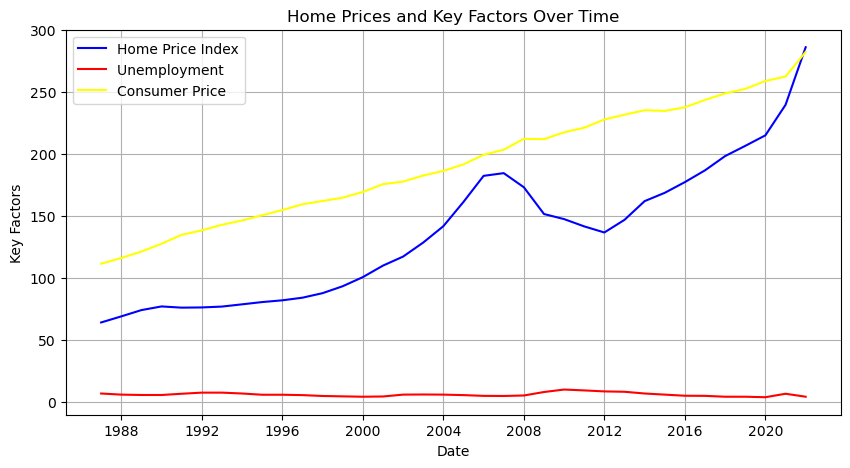

In [276]:
#Ploting home prices with key faactors
plt.figure(figsize=[10,5])
plt.plot(merged_data['DATE'], merged_data['Home Price'], label='Home Price Index', color='blue')
plt.plot(merged_data['DATE'], merged_data['Unemployment Rate'], label='Unemployment ', color='red')
plt.plot(merged_data['DATE'], merged_data['Consumer Price'], label= 'Consumer Price', color='yellow')
plt.xlabel('Date')
plt.ylabel('Key Factors')
plt.title('Home Prices and Key Factors Over Time')
plt.legend()
plt.grid()

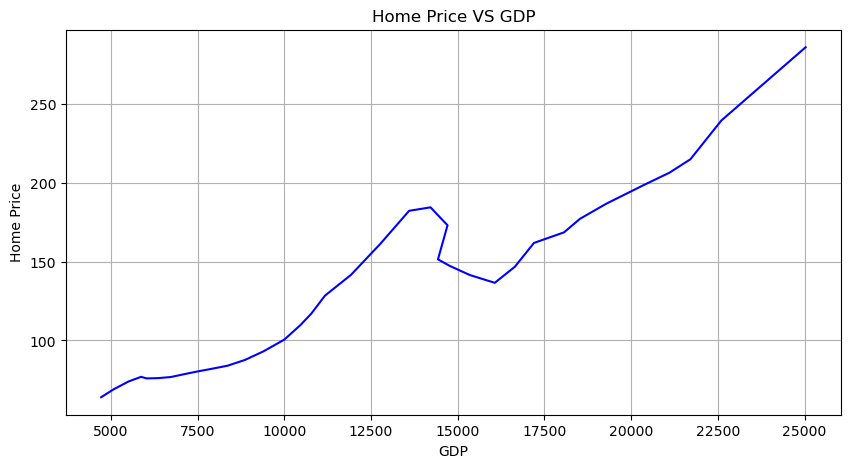

In [185]:
plt.figure(figsize=[10,5])
plt.plot(merged_data['GDP'], merged_data['Home Price'], label='Home Price Index', color='blue')
plt.title('Home Price VS GDP')
plt.xlabel("GDP")
plt.ylabel("Home Price")
plt.grid()

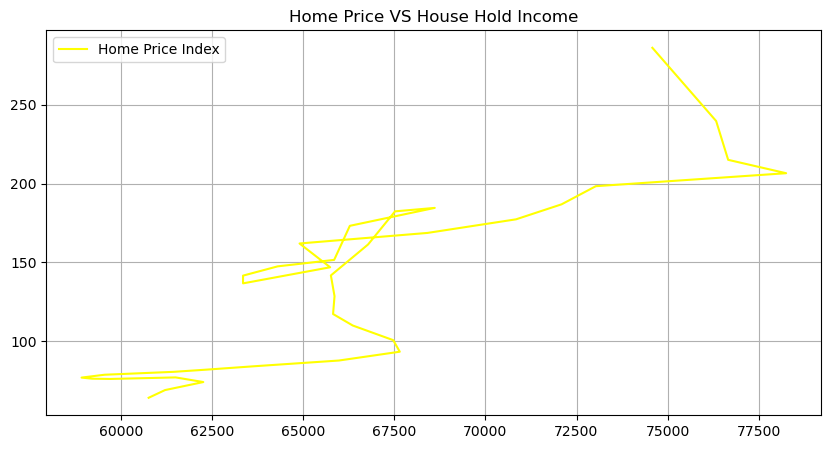

In [278]:
plt.figure(figsize=[10,5])
plt.plot(merged_data['Household Income'], merged_data['Home Price'], label='Home Price Index', color='yellow')
plt.legend()
plt.title('Home Price VS House Hold Income')
plt.grid()

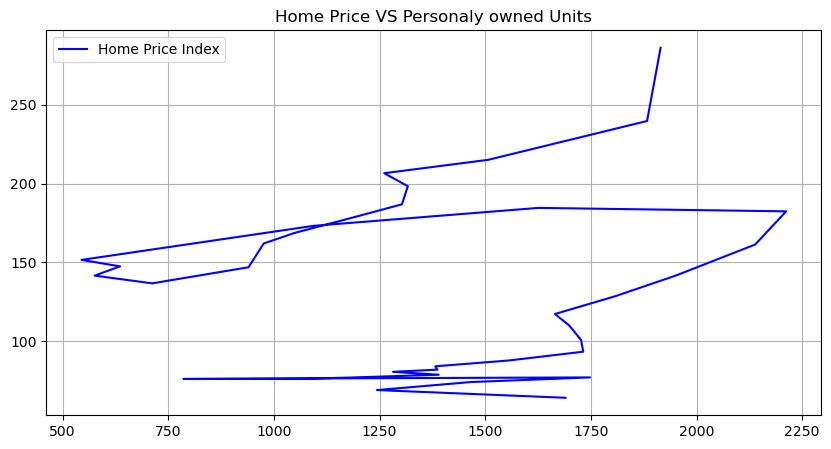

In [216]:
plt.figure(figsize=[10,5])
plt.plot(merged_data['Personaly owned Units'], merged_data['Home Price'], label='Home Price Index', color='blue')
plt.legend()
plt.title('Home Price VS Personaly owned Units')
plt.grid()

                      DATE  Home Price           GDP  Household Income  \
count                   36   36.000000     36.000000         36.000000   
mean   2004-07-02 00:00:00  135.587556  12783.230722      66175.555556   
min    1987-01-01 00:00:00   63.965000   4722.156000      58920.000000   
25%    1995-10-01 18:00:00   81.482000   7781.923250      62327.500000   
50%    2004-07-02 00:00:00  139.061000  12345.366500      65835.000000   
75%    2013-04-02 06:00:00  174.163500  16785.576250      67840.000000   
max    2022-01-01 00:00:00  286.172000  25029.116000      78250.000000   
std                    NaN   55.493494   5654.706062       5052.710981   

       Unemployment Rate  Consumer Price  Personaly owned Units  \
count          36.000000       36.000000              36.000000   
mean            5.775000      191.504972            1378.583333   
min             3.600000      111.400000             545.000000   
25%             4.675000      153.650000            1089.750000  

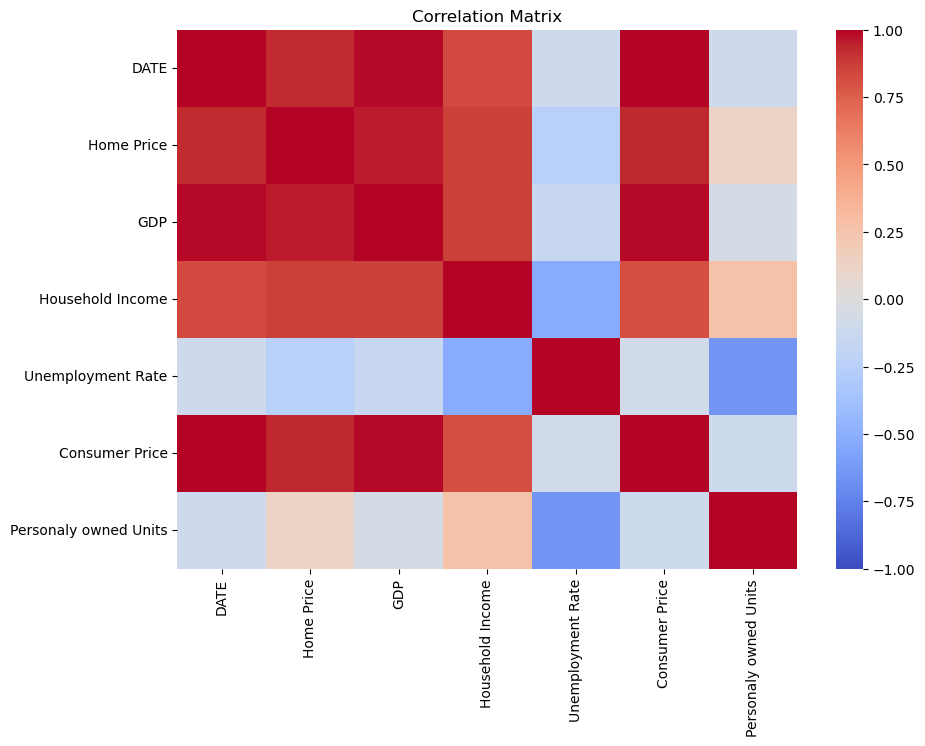

In [282]:
corr_matrix = merged_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()